#        EDA WITH PYTHON FOR THE DIVVY DATASET

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [155]:
df = pd.read_csv('divvy.csv')

## Handling missing values

In [157]:
df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    29283
start_station_id      29283
end_station_name      31158
end_station_id        31158
start_lat                 0
start_lng                 0
end_lat                 128
end_lng                 128
member_casual             0
dtype: int64

In [163]:
df[['start_station_name','start_station_id','end_station_name','end_station_id']].mode()

,start_station_name,start_station_id,end_station_name,end_station_id
0,Kingsbury St & Kinzie St,KA1503000043,Kingsbury St & Kinzie St,KA1503000043


In [167]:
# replacing the calculated mode above

df['start_station_name'].fillna('Kingsbury St & Kinzie St', inplace= True)
df['start_station_id'].fillna('KA1503000043', inplace= True)
df['end_station_name'].fillna('Kingsbury St & Kinzie St', inplace= True)
df['end_station_id'].fillna('KA1503000043', inplace= True)

In [ ]:
df.isna().sum()

In [173]:
df= df.dropna()

In [175]:
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [176]:
# check for duplicates 

df.duplicated().sum()

0

### Modify column datatypes

In [179]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [178]:
## date column to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

## Exploratory analysis:

## ---- Formatting new columns

In [180]:
# featuring a ride_start_hour column

df["ride_start_hour"] = df["started_at"].dt.hour


In [227]:
df.dtypes



ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_start_hour                 int32
ride_day_num                    int32
ride_day                       object
ride_duration(mins)           float64
ride_category                  object
ride_time_category             object
ride_day_category              object
dtype: object

In [181]:
# featuring a ride day column in numbers

df["ride_day_num"] = pd.to_datetime(df["started_at"]).dt.dayofweek

In [182]:
# featuring a ride day column in text

df["ride_day"] = pd.to_datetime(df["started_at"]).dt.strftime('%A')


In [ ]:
# featuring a ride month column--- All rides for this dataset happened in December

#df["ride_mon"] = pd.to_datetime(df["started_at"]).dt.month
#df.head()

In [183]:
# new column for ride duration in minutes

df['ride_duration(mins)'] = (df['ended_at'] - df['started_at']).dt.total_seconds()/60

In [185]:
df['ride_duration(mins)'] = df['ride_duration(mins)'].round(0)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_start_hour,ride_day_num,ride_day,ride_duration(mins)
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,10,0,Monday,9.0
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,6,6,Sunday,26.0
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,8,1,Tuesday,12.0
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,18,1,Tuesday,29.0
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,16,2,Wednesday,14.0


In [189]:
# ride_category column

df['ride_category'] = 'paying'

In [191]:
# Categorize riders based on ride duration

df.loc[df['ride_duration(mins)'] <= 45, 'ride_category'] = 'free ride'

In [193]:
# ride_time_category column

df['ride_time_category'] = 'Off-Peak'


In [194]:
df.loc[(df['ride_start_hour'] >= 7) & (df['ride_start_hour'] <= 10), 'ride_time_category'] = 'Peak'

In [195]:
# formating the ride_time_category column

df['ride_day_category'] = 'Weekday'


In [196]:
df.loc[df['ride_day_num'] >= 5.0, 'ride_day_category'] = 'Weekend'

In [197]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_start_hour,ride_day_num,ride_day,ride_duration(mins),ride_category,ride_time_category,ride_day_category
0,65DBD2F447EC51C2,electric_bike,2022-12-05 10:47:18,2022-12-05 10:56:34,Clifton Ave & Armitage Ave,TA1307000163,Sedgwick St & Webster Ave,13191,41.918244,-87.657115,41.922167,-87.638888,member,10,0,Monday,9.0,free ride,Peak,Weekday
1,0C201AA7EA0EA1AD,classic_bike,2022-12-18 06:42:33,2022-12-18 07:08:44,Broadway & Belmont Ave,13277,Sedgwick St & Webster Ave,13191,41.940106,-87.645451,41.922167,-87.638888,casual,6,6,Sunday,26.0,free ride,Off-Peak,Weekend
2,E0B148CCB358A49D,electric_bike,2022-12-13 08:47:45,2022-12-13 08:59:51,Sangamon St & Lake St,TA1306000015,St. Clair St & Erie St,13016,41.885919,-87.651133,41.894345,-87.622798,member,8,1,Tuesday,12.0,free ride,Peak,Weekday
3,54C5775D2B7C9188,classic_bike,2022-12-13 18:50:47,2022-12-13 19:19:48,Shields Ave & 31st St,KA1503000038,Damen Ave & Madison St,13134,41.838464,-87.635406,41.881370,-87.674930,member,18,1,Tuesday,29.0,free ride,Off-Peak,Weekday
4,A4891F78776D35DF,classic_bike,2022-12-14 16:13:39,2022-12-14 16:27:50,Ashland Ave & Chicago Ave,13247,Damen Ave & Charleston St,13288,41.895954,-87.667728,41.920082,-87.677855,casual,16,2,Wednesday,14.0,free ride,Off-Peak,Weekday


### --- Answering EDA questions

 #### 1. What is the proportion of rides made by members compared to casual users?

In [198]:

mem_cas_prop= df['member_casual'].value_counts().to_frame().reset_index()
mem_cas_prop

,member_casual,count
0,member,136887
1,casual,44791


In [199]:
# to get the exact proportion of  rides

x= int((df['member_casual']== 'member').sum() / (df['member_casual']== 'member').sum()) # formula for the member portion
y= int ((df['member_casual']== 'member').sum() / (df['member_casual']== 'casual').sum()) # formula for the casual portion

print('The proportion of the rides made by members to casual is', x  ,':', y)

The proportion of the rides made by members to casual is 1 : 3


#### 2. Do the proportions of free and paying rides change during different days of the week?


In [203]:
ride_cat_wkday = pd.crosstab(df['ride_day'], df['ride_category'])
ride_cat_wkday

ride_category,free ride,paying
ride_day,,
Friday,26330,466
Monday,23523,290
Saturday,24081,458
Sunday,17109,332
Thursday,34722,529
Tuesday,27754,260
Wednesday,25528,296


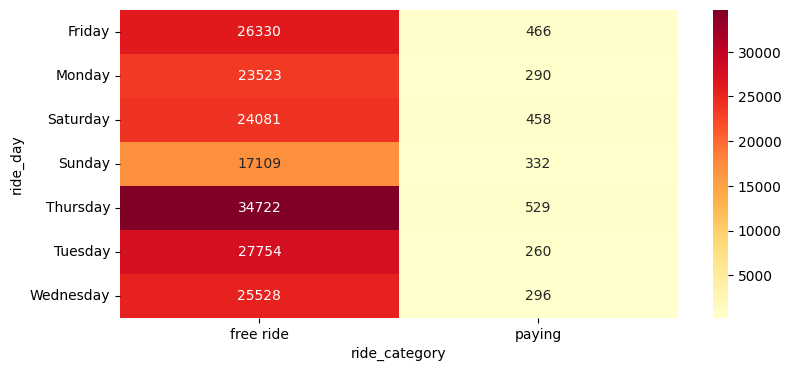

In [212]:
plt.figure(figsize=(9, 4))
sn.heatmap(ride_cat_wkday, annot= True, fmt= '.0f', cmap='YlOrRd')
plt.show()

#### 3.  How does the distribution of ride durations vary between electric bikes and classic bikes?

In [213]:
# 3. 
rid_dur_dist = df.groupby('rideable_type')['ride_duration(mins)'].sum().sort_values(ascending= False).to_frame().reset_index().head(2)
rid_dur_dist

,rideable_type,ride_duration(mins)
0,electric_bike,1058227.0
1,classic_bike,887934.0


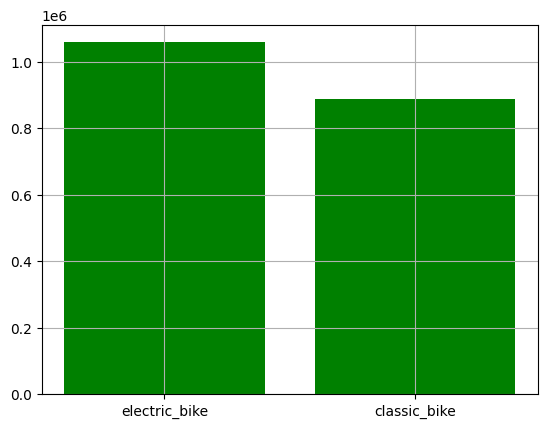

In [214]:
plt.bar(rid_dur_dist['rideable_type'], rid_dur_dist['ride_duration(mins)'], color= 'green')
plt.grid()
plt.show()


#### 4.   Which start station has the highest average ride duration?

In [216]:


df.groupby('start_station_name')['ride_duration(mins)'].mean().rank(ascending= True).to_frame().head(1).reset_index()

,start_station_name,ride_duration(mins)
0,2112 W Peterson Ave,632.0


#### 5. Visualize the frequency of rides for member and casual riders during peak and off-peak times.

In [217]:


ride_time_memb_cas = pd.crosstab(df['member_casual'],df['ride_time_category'] )
ride_time_memb_cas


ride_time_category,Off-Peak,Peak
member_casual,,
casual,37539,7252
member,106306,30581


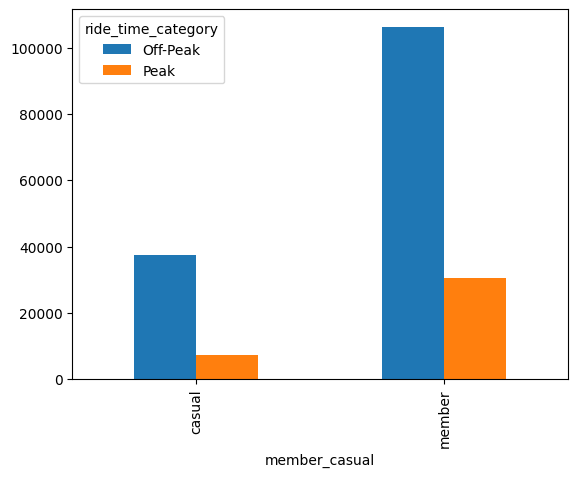

In [218]:
ride_time_memb_cas.plot(kind= 'bar')
plt.show()

### 6. Are certain stations more popular during peak hours compared to offpeak hours?


In [219]:
station_hr_pop = pd.crosstab(df['start_station_name'], df['ride_time_category']).reset_index().head(10)
station_hr_pop

ride_time_category,start_station_name,Off-Peak,Peak
0,2112 W Peterson Ave,33,10
1,63rd St Beach,1,0
2,900 W Harrison St,396,69
3,Aberdeen St & Jackson Blvd,423,133
4,Aberdeen St & Monroe St,266,126
5,Aberdeen St & Randolph St,336,73
6,Ada St & Washington Blvd,197,69
7,Adler Planetarium,156,26
8,Albany Ave & 16th St,2,0
9,Albany Ave & 26th St,9,5


### 7.How does the categorization of rides into peak and off-peak times impact daily rides?

In [221]:

ride_time_wkday = pd.crosstab(df['ride_time_category'], df['ride_day'])
ride_time_wkday

ride_day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
ride_time_category,,,,,,,
Off-Peak,21881,18819,20527,14747,26584,21190,20097
Peak,4915,4994,4012,2694,8667,6824,5727


<Figure size 1500x600 with 0 Axes>

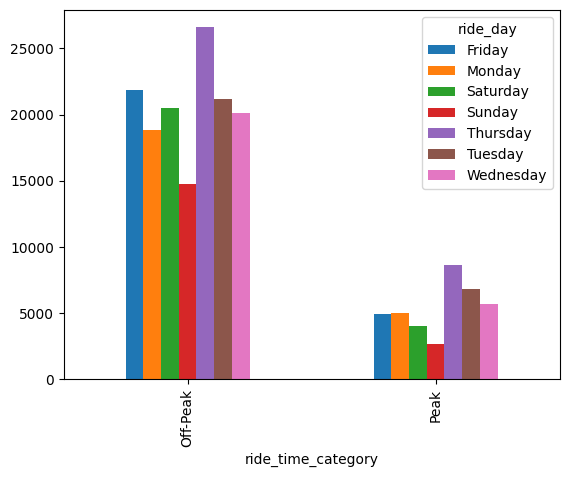

In [222]:

plt.figure(figsize=(15,6))
ride_time_wkday.plot(kind='bar')
plt.show()

####  11.Visualize the number of trips by day of the week.

In [223]:


trip_day_count = df['ride_day'].value_counts().to_frame().reset_index()
trip_day_count

,ride_day,count
0,Thursday,35251
1,Tuesday,28014
2,Friday,26796
3,Wednesday,25824
4,Saturday,24539
5,Monday,23813
6,Sunday,17441


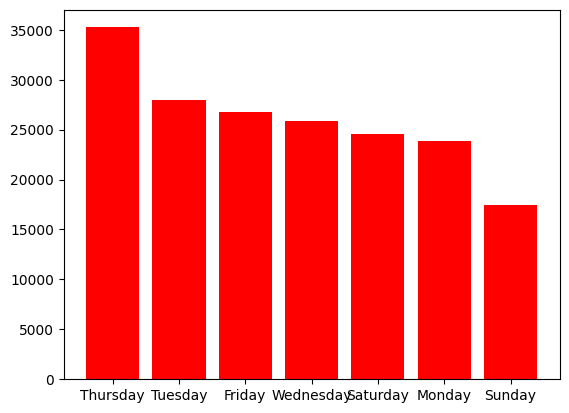

In [224]:
plt.bar(trip_day_count['ride_day'], trip_day_count['count'], color= 'red')
plt.show()

### 12.Visualize the number of trips by hour of the day.

In [225]:


trip_hour_count = df['ride_start_hour'].value_counts().to_frame().reset_index()
trip_hour_count


,ride_start_hour,count
0,17,17075
1,16,16091
2,15,13800
3,18,12957
4,8,12340
5,14,10969
6,12,10806
7,13,10537
8,7,9932
9,11,9586


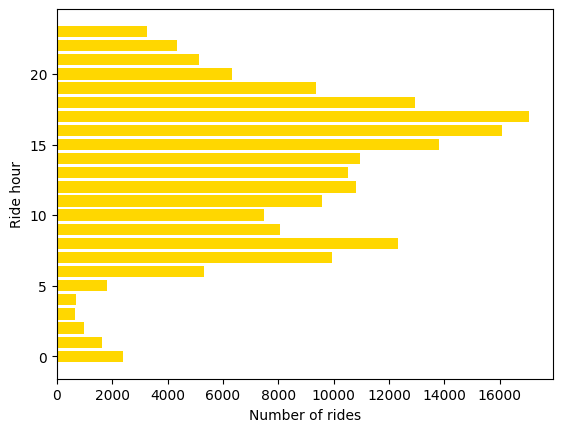

In [226]:
plt.barh(trip_hour_count['ride_start_hour'], trip_hour_count['count'], color= 'gold', align='center')
plt.xlabel('Number of rides')
plt.ylabel('Ride hour')
plt.show()


In [148]:
# export final dataset

df.to_csv("divvy2.csv", index= False)